# Main notebook for visualization

In [1]:
# Mount google drive if running from Google Collab
from google.colab import drive
drive.mount('/content/drive')

# Set current directory if running from Google Collab
import os
os.chdir('/content/drive/My Drive/Carbon_price_prediction/Workspace/Data')

Mounted at /content/drive


In [82]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from matplotlib import dates as mdates
import seaborn as sns

from scipy.stats import kendalltau, spearmanr, pearsonr

## Load data

In [119]:
# Data params
methodology = 'tf_idf' # 'tf_idf' or 'bag_of_words'
data_source = 'gdelt' # 'gdelt'
glossary_source = 'lemmatized_grouped_custom' # 'BBC' or 'IPCC' or 'custom' or 'lemmatized_custom' or 'lemmatized_grouped_custom'
version = '' # 'new' or '' for old (in case of BBC), otherwise use ''

# Model specification
nr_lags = 1
test_window = 100 
model_type = 'ols'
specification = 'full'

In [120]:
tf_idf_grouped = pd.read_csv( f'{methodology}_{data_source}_{glossary_source}_{version}keywords.csv',
                     index_col=0, parse_dates=True)
tf_idf_grouped.index.name = 'date'

In [121]:
tf_idf_grouped.columns = ["Emissions", "Fossil fuel", "Gas", "Policy", "Renewables"]

In [122]:
tf_idf_grouped.head()

,Emissions,Fossil fuel,Gas,Policy,Renewables
date,,,,,
2017-01-01,1.401814,1.327482,1.42884,1.108096,1.360407
2017-01-02,0.000000,0.000000,0.00000,0.000000,1.360407
2017-01-03,0.000000,0.906148,0.00000,0.554048,0.000000
2017-01-04,0.000000,0.000000,0.00000,1.108096,0.000000
2017-01-05,0.000000,0.571716,0.71442,1.916691,0.000000


In [123]:
glossary_source = "lemmatized_aggregated"

In [124]:
tf_idf_sum = pd.read_csv( f'{methodology}_{data_source}_{glossary_source}_{version}keywords.csv',
                     index_col=0, parse_dates=True)
tf_idf_sum.index.name = 'date'
tf_idf_sum.columns = ["score"]

In [125]:
tf_idf_sum.head()

,score
date,
2017-01-01,1.900061
2017-01-02,0.790976
2017-01-03,0.998100
2017-01-04,0.998100
2017-01-05,1.846705


In [126]:
# Import predictions
test_pred_df = pd.read_csv(f'forecasts/test_pred_{specification}_{model_type}_{nr_lags}lags_{test_window}test_window.csv',
                        index_col=0, parse_dates=True)

test_pred_df.head()

,prediction,true value
date,,
2021-07-14,-0.002667,0.009791
2021-07-15,0.001478,-0.007523
2021-07-16,0.001087,-0.001511
2021-07-19,0.000353,-0.009117
2021-07-20,0.004519,-0.023163


In [127]:
test_pred_df.index

DatetimeIndex(['2021-07-14', '2021-07-15', '2021-07-16', '2021-07-19',
               '2021-07-20', '2021-07-21', '2021-07-22', '2021-07-23',
               '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
               '2021-07-30', '2021-08-02', '2021-08-03', '2021-08-04',
               '2021-08-05', '2021-08-06', '2021-08-09', '2021-08-10',
               '2021-08-11', '2021-08-12', '2021-08-13', '2021-08-16',
               '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-30', '2021-08-31', '2021-09-01',
               '2021-09-02', '2021-09-03', '2021-09-06', '2021-09-07',
               '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-13',
               '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17',
               '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23',
               '2021-09-24', '2021-09-27', '2021-09-28', '2021-09-29',
      

In [128]:
predictors = pd.read_csv( "./new_data/new_merged_dataset.csv", index_col=0,
                         parse_dates=True, dayfirst=True)
predictors.index.name = 'date'
# predictors = predictors.loc[(predictors.index >= start_date) & (predictors.index <= end_date)]
predictors.head()

,carbon_price,oil_price,energy_price,gas_price,coal_price,stock_price,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,6.12,56.82,NaN,NaN,NaN,363.18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,5.43,55.47,NaN,49.45,82.50,365.71,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,5.72,56.46,NaN,50.68,84.20,365.26,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,5.29,56.89,NaN,50.69,85.75,365.64,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,5.50,57.10,NaN,49.77,84.75,365.45,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Aggregated TF-IDF scores

In [ ]:
x_sum = tf_idf_sum.index
y_sum = tf_idf_sum["score"]

In [ ]:
tf_idf_sum_average = tf_idf_sum.rolling(window=30).mean()

In [ ]:
x_sum_average = tf_idf_sum_average.index
y_sum_average = tf_idf_sum_average["score"]

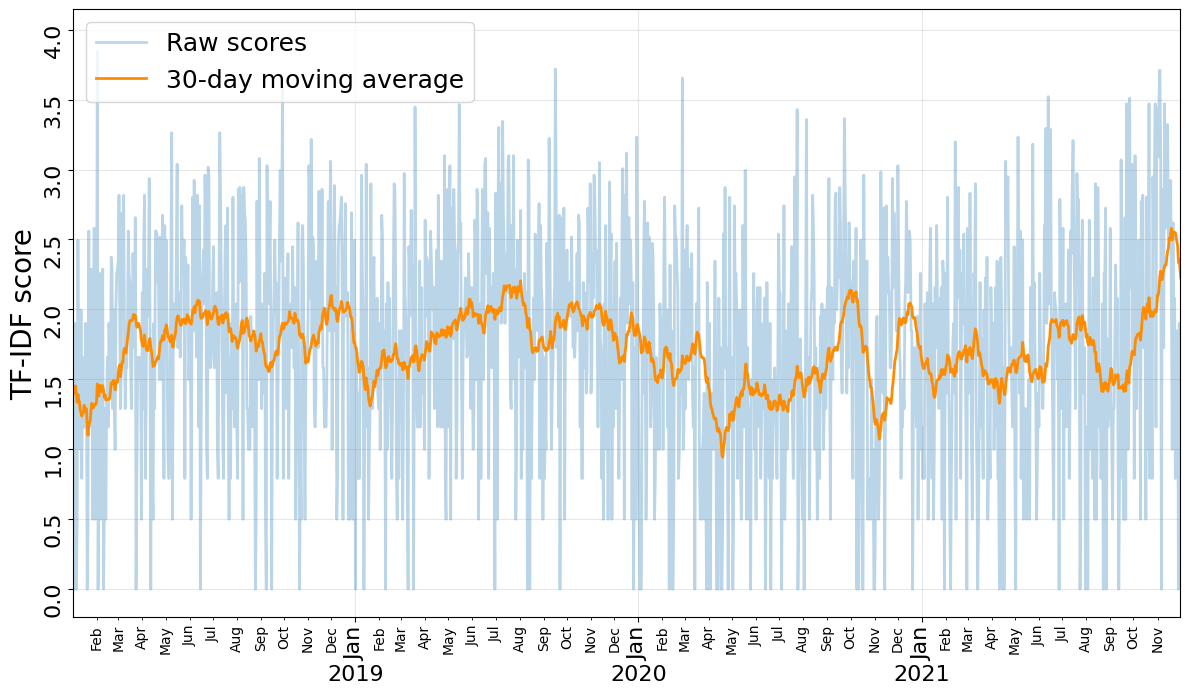

In [ ]:
with plt.style.context("default"):
    plt.figure(figsize=(12, 7))
    plt.plot(x_sum, y_sum, linewidth=2.0, alpha=0.3, label='Raw scores')
    plt.plot(x_sum_average, y_sum_average, linewidth=2.0, label='30-day moving average', color="darkorange")
    plt.ylabel('TF-IDF score', fontsize=20)
    # plt.xlabel('Date', fontsize=20)
    plt.legend(loc='upper left', fontsize=18)
    # plt.title("Time series of aggregated keyword index")
        
    # Minor ticks every month.
    fmt_month = mdates.MonthLocator()
    # Minor ticks every year.
    fmt_year = mdates.YearLocator()

    ax = plt.gca()
    ax.xaxis.set_minor_locator(fmt_month)
    # '%b' to get the names of the month
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_major_locator(fmt_year)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_label_coords(.5, -.11)
    ax.tick_params(which='both', rotation=90)

    # create a second x-axis beneath the first x-axis to show the year in YYYY format
    sec_xaxis = ax.secondary_xaxis(-.07)
    sec_xaxis.xaxis.set_major_locator(fmt_year)
    sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.set_xlim([datetime.date(2018, 1, 2), datetime.date(2021, 11, 30)])

    # Hide the second x-axis spines and ticks
    sec_xaxis.spines['bottom'].set_visible(False)
    sec_xaxis.tick_params(length=0)

    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    sec_xaxis.tick_params(axis='both', which='major', labelsize=16)

    # for k, (i, j) in enumerate(zip(x_sum, y_sum)):
    #     if k % 10 == 0:
    #         ax.annotate(str(round(j, 2)),xy=(i, j))

    plt.grid(visible=True, alpha=0.3, which='major', axis="x")
    plt.grid(visible=True, alpha=0.3, which='major', axis="y")

    plt.tight_layout()
    plt.savefig(f'./EDA/aggregated_30ma.pdf')

## Grouped TF-IDF scores

In [ ]:
groups_30ma = pd.DataFrame()
for colname, colval in tf_idf_grouped.iteritems():
    groups_30ma[colname] = colval.rolling(window=30).mean()

In [ ]:
colormap = mpl.cm.Set1.colors

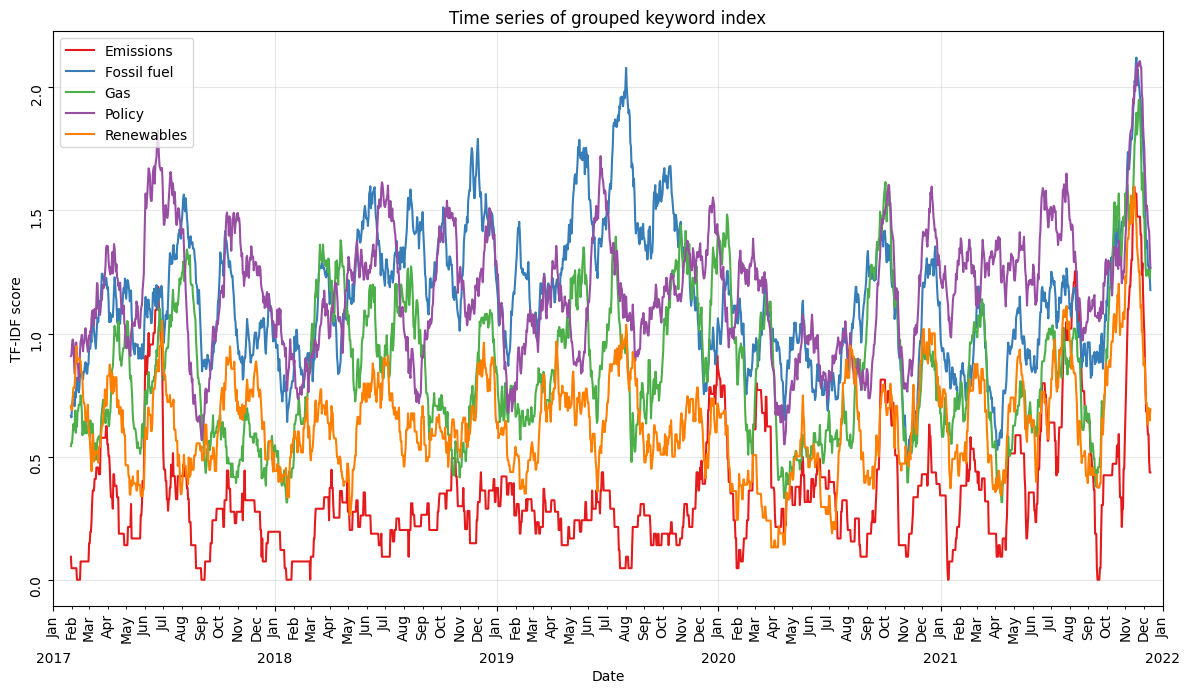

In [ ]:
with plt.style.context("default"):
    plt.figure(figsize=(12, 7))
    for color, (colname, colval) in zip(colormap, groups_30ma.iteritems()): 
        plt.plot(colval, label=colname, color=color)
    #plt.plot(x_sum_average, y_sum_average, linewidth=2.0, label='30-day moving average', color="darkorange")
    plt.ylabel('TF-IDF score')
    plt.xlabel('Date')
    plt.legend(loc='upper left')
    plt.title("Time series of grouped keyword index")
        
    # Minor ticks every month.
    fmt_month = mdates.MonthLocator()
    # Minor ticks every year.
    fmt_year = mdates.YearLocator()

    ax = plt.gca()
    ax.xaxis.set_minor_locator(fmt_month)
    # '%b' to get the names of the month
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_major_locator(fmt_year)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_label_coords(.5, -.11)
    ax.tick_params(which='both', rotation=90)

    # create a second x-axis beneath the first x-axis to show the year in YYYY format
    sec_xaxis = ax.secondary_xaxis(-.07)
    sec_xaxis.xaxis.set_major_locator(fmt_year)
    sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2022, 1, 1)])

    # Hide the second x-axis spines and ticks
    sec_xaxis.spines['bottom'].set_visible(False)
    sec_xaxis.tick_params(length=0)

    # for k, (i, j) in enumerate(zip(x_sum, y_sum)):
    #     if k % 10 == 0:
    #         ax.annotate(str(round(j, 2)),xy=(i, j))

    plt.grid(visible=True, alpha=0.3, which='major', axis="x")
    plt.grid(visible=True, alpha=0.3, which='major', axis="y")

    plt.tight_layout()
    #plt.savefig(f'./EDA/grouped_30ma.pdf')

# Return forecasting graphs

## Return scatterplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


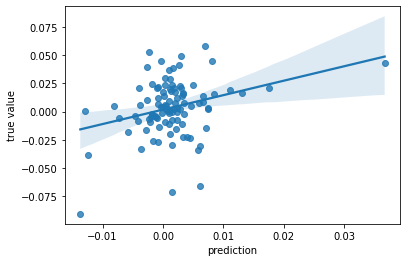

In [129]:
sns.regplot(test_pred_df['prediction'], test_pred_df['true value'])

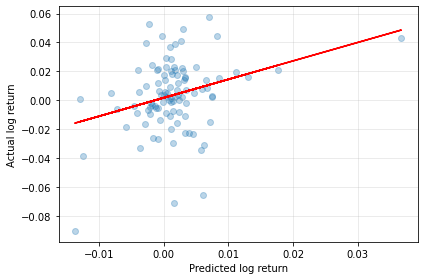

In [130]:
plt.scatter(test_pred_df['prediction'], test_pred_df['true value'], alpha=0.3)

# Fit regression line
m, b = np.polyfit(test_pred_df['prediction'], test_pred_df['true value'], 1)

#use red as color for regression line
plt.plot(test_pred_df['prediction'],
         m * test_pred_df['prediction'] + b,
         color='red')

plt.grid(visible=True, alpha=0.3, which='major', axis="x")
plt.grid(visible=True, alpha=0.3, which='major', axis="y")

plt.ylabel("Actual log return")
plt.xlabel("Predicted log return")
plt.tight_layout()
plt.savefig(f'./forecasts/log_return_carbon_price_1day_ahead_forecast_{specification}_{model_type}_{nr_lags}lags_{test_window}test_window.pdf')
plt.show()

In [131]:
corr, p_val = pearsonr(test_pred_df['true value'], test_pred_df['prediction'])
print(f"Pearson's correlation: {round(corr, 3)}")
print(f"Pearson's correlation p-value: {round(p_val, 3)}")

Pearson's correlation: 0.307
Pearson's correlation p-value: 0.002


In [132]:
corr, p_val = kendalltau(test_pred_df['true value'], test_pred_df['prediction'])
print(f"Kendall's tau rank correlation: {round(corr, 3)}")
print(f"Kendall's tau rank correlation p-value: {round(p_val, 3)}")

Kendall's tau rank correlation: 0.14
Kendall's tau rank correlation p-value: 0.039


In [133]:
corr, p_val = spearmanr(test_pred_df['true value'], test_pred_df['prediction'])
print(f"Spearman rank-order correlation: {round(corr, 3)}")
print(f"Spearman rank-order correlation p-value: {round(p_val, 3)}")

Spearman rank-order correlation: 0.206
Spearman rank-order correlation p-value: 0.04


## Carbon price graph

In [134]:
test_dates = [test_pred_df.index[0] - pd.tseries.offsets.BDay(1)] + list(test_pred_df.index.values)

test_dates = pd.DatetimeIndex(test_dates)

In [135]:
test_carbon_price = predictors[['carbon_price']].loc[test_dates]
test_carbon_price = test_carbon_price.join(test_pred_df[['prediction']])
test_carbon_price.head()

,carbon_price,prediction
date,,
2021-07-13,52.85,NaN
2021-07-14,53.37,-0.002667
2021-07-15,52.97,0.001478
2021-07-16,52.89,0.001087
2021-07-19,52.41,0.000353


In [136]:
test_carbon_price['carbon_price_pred'] = (np.exp(test_carbon_price.prediction.shift(-1)) * \
                                         test_carbon_price['carbon_price']).shift(1)

test_carbon_price = test_carbon_price.dropna()

In [137]:
test_carbon_price.head()

,carbon_price,prediction,carbon_price_pred
date,,,
2021-07-14,53.37,-0.002667,52.709227
2021-07-15,52.97,0.001478,53.448951
2021-07-16,52.89,0.001087,53.027629
2021-07-19,52.41,0.000353,52.908649
2021-07-20,51.21,0.004519,52.647367


In [138]:
test_carbon_price.tail()

,carbon_price,prediction,carbon_price_pred
date,,,
2021-11-24,72.91,-0.002258,69.014004
2021-11-25,74.46,0.001817,73.042612
2021-11-26,72.78,0.003997,74.758220
2021-11-29,74.21,0.011193,73.599206
2021-11-30,75.37,0.008513,74.844446


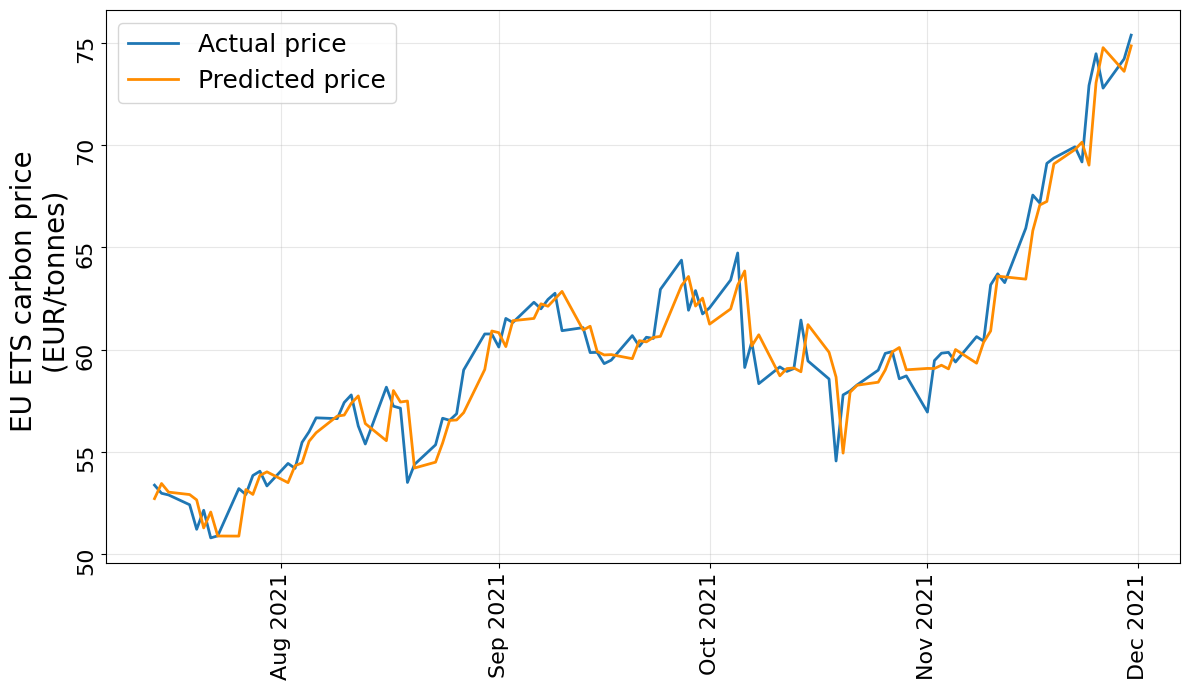

In [139]:
with plt.style.context("default"):
    plt.figure(figsize=(12, 7))
    plt.plot(test_carbon_price['carbon_price'], linewidth=2.0,
         label="Actual price")
    plt.plot(test_carbon_price['carbon_price_pred'], linewidth=2.0,
             color="darkorange", label="Predicted price")
    plt.ylabel('EU ETS carbon price \n (EUR/tonnes)', fontsize=20)
    plt.legend(loc='upper left', fontsize=18)
        
    # Minor ticks every month.
    fmt_month = mdates.MonthLocator()
    # Minor ticks every year.
    fmt_year = mdates.YearLocator()

    ax = plt.gca()
    # ax.xaxis.set_minor_locator(fmt_month)
    ax.xaxis.set_major_locator(fmt_month)
    # '%b' to get the names of the month
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(fmt_month)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_label_coords(.5, -.11)
    ax.tick_params(which='both', rotation=90)

    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=10)

    plt.grid(visible=True, alpha=0.3, which='major', axis="x")
    plt.grid(visible=True, alpha=0.3, which='major', axis="y")

    plt.tight_layout()
    plt.savefig(f'./forecasts/carbon_price_1day_ahead_forecast_{specification}_{model_type}_{nr_lags}lags_{test_window}test_window.pdf')

# Support

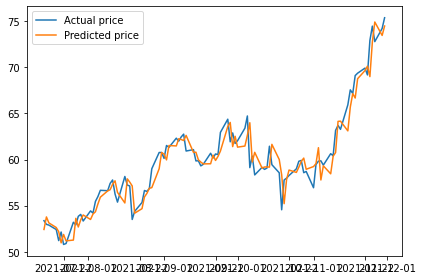

In [117]:
plt.plot(test_carbon_price['carbon_price'],
         label="Actual price")
plt.plot(test_carbon_price['carbon_price_pred'],
         label="Predicted price")
plt.legend()
plt.tight_layout()
plt.show()

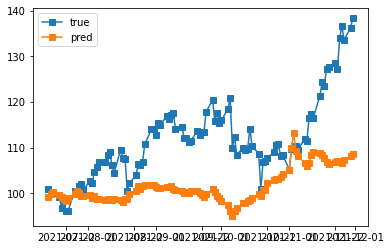

In [118]:
rebased_true = (1 + test_pred_df['true value']).cumprod() * 100
# rebased_true.index = pd.DatetimeIndex(rebased_true.index)
rebased_pred = (1 + test_pred_df['prediction']).cumprod() * 100
# rebased_pred.index = pd.DatetimeIndex(rebased_pred.index)

plt.plot(rebased_true, marker="s", label="true")
plt.plot(rebased_pred, marker="s", label="pred")
plt.legend()
plt.show()